In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('../../../Data_Sets/HDFC-HakerEarth/DataSet/Train.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [4]:
df.shape

(17521, 2395)

In [76]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,10867.1100000000,8648.3450000000,15766.1790900000,28904.6616700000,5273.6550000000,23461.5316700000,12855.9716300000,28715.0887600000,...,0,1,0,1,214.0000000000,214.0000000000,68.0000000000,22.0000000000,22.0000000000,7.0000000000
1,RIMHI5ZGP,0,258431.2433000000,217963.2725000000,186628.6820000000,186628.6820000000,215451.8950000000,192361.5160000000,172653.7646000000,166697.3887000000,...,0,0,0,0,41.0000000000,41.0000000000,38.0000000000,12.0000000000,12.0000000000,11.0000000000
2,RIHOG1SZU,0,14593548.2300000004,12600603.8900000006,11003145.2400000002,10103145.2400000002,18798818.4600000009,15140351.7599999998,5320778.3310000002,6906324.1090000002,...,0,1,1,0,378.0000000000,378.0000000000,310.0000000000,21.0000000000,21.0000000000,16.0000000000
3,RIHOLMQWU,0,672704.3133000000,818111.5750000000,679489.2600000000,679489.2600000000,825725.4375000000,760580.3500000000,357713.4326000000,423661.1582000000,...,0,0,0,0,702.0000000000,702.0000000000,644.0000000000,951.0000000000,951.0000000000,743.0000000000
4,RIHO584ET,0,-1218742.4569999999,-3005360.9750000001,-166624.0580000000,-2403574.4939999999,2583182.6680000001,2086546.1340000001,5938358.3389999997,5446532.1500000004,...,0,0,0,0,1305.0000000000,1305.0000000000,1211.0000000000,2205.0000000000,2205.0000000000,1831.0000000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2395 entries, Col1 to Col2397
dtypes: float64(844), int64(1548), object(3)
memory usage: 320.2+ MB


Check **Object** type variable. Possibility of missing data or categorical variable

In [18]:
df[df.columns[df.dtypes == 'O']].head()

,Col1,Col747,Col836
0,RIGHGSN,NaN,NaN
1,RIMHI5ZGP,NaN,NaN
2,RIHOG1SZU,NaN,NaN
3,RIHOLMQWU,NaN,NaN
4,RIHO584ET,NaN,NaN


In [21]:
df[df.columns[df.dtypes == 'O']].isnull().sum() / df.index.size

Col1    0.0
dtype: float64

For **Col747 & Col 836** 96% of data missing.<br>
Will drop both the columns

In [126]:
df.drop(columns=['Col747', 'Col836'], inplace=True, axis=1)

In [127]:
missingData = df[df.columns[df.dtypes == 'int64']].isnull().sum() / df.index.size
missingData  = missingData[ missingData > 0]
missingData

Series([], dtype: float64)

No miisng rows for int columns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2393 entries, Col1 to Col2397
dtypes: float64(844), int64(1548), object(1)
memory usage: 319.9+ MB


In [128]:
#So only float data types columns might have missing values
missingData = round(df.isnull().sum() / df.index.size * 100)
missingData = missingData[missingData > 0]
missingData

Col13      7.0000000000
Col14      7.0000000000
Col15      7.0000000000
Col16      7.0000000000
Col17      8.0000000000
Col18     16.0000000000
Col19     84.0000000000
Col20     82.0000000000
Col21      7.0000000000
Col22      7.0000000000
Col23      7.0000000000
Col24      7.0000000000
Col27      4.0000000000
Col28     70.0000000000
Col37     91.0000000000
Col38     97.0000000000
Col39     87.0000000000
Col40     97.0000000000
Col41     91.0000000000
Col42     10.0000000000
Col43     10.0000000000
Col92      8.0000000000
Col93     11.0000000000
Col94     20.0000000000
Col95     36.0000000000
Col96     24.0000000000
Col97     53.0000000000
Col98     29.0000000000
Col99     74.0000000000
Col100    34.0000000000
               ...     
Col901    11.0000000000
Col902    22.0000000000
Col903    26.0000000000
Col904    17.0000000000
Col905    17.0000000000
Col906    17.0000000000
Col907    17.0000000000
Col908    17.0000000000
Col909    17.0000000000
Col910    17.0000000000
Col911    39.000

In [129]:
colToDrop = missingData [missingData > 30].index

In [130]:
df.drop(columns=colToDrop, inplace=True, axis=1)

In [61]:
df.describe()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
count,17521.000000,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,...,17521.000000,17521.000000,17521.000000,17521.000000,16347.000000,16347.000000,16335.000000,16347.00000,16347.000000,16335.000000
mean,0.100508,3.158967e+04,2.046540e+04,2.502937e+04,2.789385e+04,2.597734e+04,3.302600e+04,2.912693e+04,2.971069e+04,3.617392e+04,...,0.736202,0.595343,0.773757,0.639005,55.540038,55.015416,35.180961,17.99584,17.539977,10.359657
std,0.300685,7.612897e+05,7.136908e+05,6.018207e+05,6.091245e+05,7.211998e+05,7.488433e+05,2.175595e+05,2.981508e+05,2.612427e+05,...,0.910828,0.784953,0.921805,0.806286,53.269618,52.697069,34.956016,24.83891,24.685954,18.476447
min,0.000000,-8.555719e+07,-8.555719e+07,-7.011955e+07,-7.100920e+07,-8.480658e+07,-9.016250e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.742337e+03,2.007863e+03,1.857013e+03,2.562647e+03,2.973188e+03,3.822170e+03,1.824148e+03,1.787456e+03,3.505288e+03,...,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,12.000000,9.00000,9.000000,5.000000
50%,0.000000,9.308060e+03,6.642857e+03,6.236503e+03,8.464355e+03,1.036962e+04,1.303534e+04,5.705458e+03,5.536147e+03,8.832639e+03,...,0.000000,0.000000,0.000000,0.000000,42.000000,42.000000,27.000000,13.00000,13.000000,7.000000
75%,0.000000,3.053873e+04,2.156093e+04,2.068154e+04,2.773849e+04,2.645998e+04,3.359204e+04,1.852222e+04,1.753976e+04,2.341911e+04,...,1.000000,1.000000,1.000000,1.000000,74.000000,73.000000,47.000000,21.00000,21.000000,12.000000
max,1.000000,1.459355e+07,1.288980e+07,1.478068e+07,1.178075e+07,1.879882e+07,1.514035e+07,1.125630e+07,2.788633e+07,1.314762e+07,...,4.000000,4.000000,4.000000,4.000000,1305.000000,1305.000000,1211.000000,2205.00000,2205.000000,1831.000000


In [62]:
df['Col2'].value_counts()

0    15760
1     1761
Name: Col2, dtype: int64

In [109]:

#df.columns.size / 4 / 6
all_cols = df.columns[~df.columns.isin(missingData.index)]
all_cols = all_cols.drop(['Col1','Col2'])
all_cols.size / 4 / 6

68.08333333333333

In [120]:
all_cols.size / 100

16.34

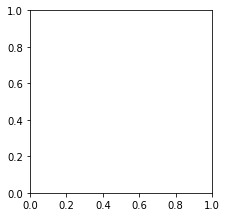

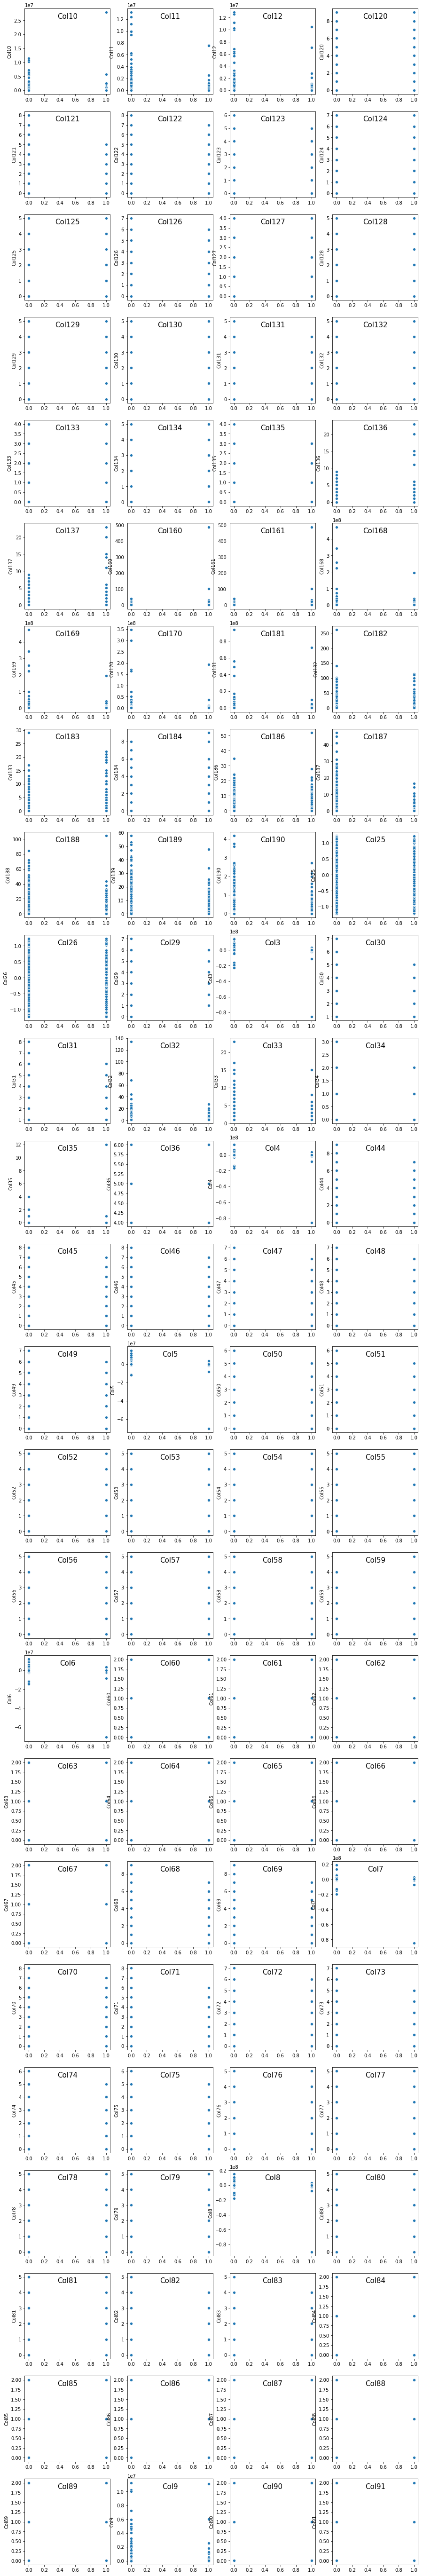

In [122]:
import math
n_cols = 4
cols = all_cols[:100]
n_rows = math.ceil(len(cols) / n_cols)
plt.figure(figsize=(15,100))
for i,c in enumerate(sorted(cols)):
    plt.subplot(n_rows, n_cols, i+1)
    ax = sns.scatterplot(df['Col2'], df[c])
    ax.set_xlabel('')
    
    plt.title(c.capitalize(), y=0.85, fontsize=15)
    
plt.show()

In [131]:
df_nomissing = df.fillna(value=df.mean())

In [132]:
#data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA

#Util
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold

#Model Algo
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Model Evluation
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Display Tree Structure
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [133]:
print("Class Ratio")
print(round(df_nomissing['Col2'].value_counts() / df_nomissing.index.size, 2))

Class Ratio
0   0.9000000000
1   0.1000000000
Name: Col2, dtype: float64


In [134]:
Y = df_nomissing['Col2']
X = df_nomissing.drop(labels=['Col1','Col2'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, random_state = 100, stratify = Y)
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set :", X_test.shape, Y_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train Set : (12264, 2132) (12264,)
Test Set : (5257, 2132) (5257,)


In [135]:
#Scale data using Standard Scaler
sc = StandardScaler()
X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [136]:
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

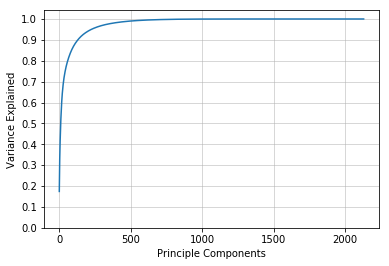

In [137]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(linestyle='-', linewidth = 0.5)
plt.xlabel('Principle Components')
plt.ylabel('Variance Explained')
plt.show()

In [146]:
df_nomissing.columns.size

2134

In [145]:
pca.explained_variance_.size

2132

In [147]:
np.cumsum(pca.explained_variance_ratio_)[np.arange(99,699,50)]

array([0.8686552 , 0.91454923, 0.94083308, 0.95756602, 0.96893787,
       0.97688829, 0.98262942, 0.9869535 , 0.99022718, 0.99267219,
       0.9945287 , 0.99594046])

In [141]:
[np.arange(100,700,50)]

[array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650])]

In [ ]:
pca = IncrementalPCA(n_components=400)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [ ]:
#Create 5 Fold Cross Validation Using Stratified H Fold which will also help in class imbalance problem
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

In [ ]:
#As Churner ratio is not balanced, we have use Class Weight as one of the important parameters while building model
#We Can Use Class Weight value as "Balanced" Or Churn class Ratio

lr = LogisticRegression(random_state=100)
param = {'C' : [0.0001,0.001,0.1,1], 
         'class_weight' : ['balanced', {0:10,1:90}]}
model_lr = GridSearchCV(lr, param_grid=param, scoring='recall', cv=folds, n_jobs=-1, verbose=1, return_train_score=True, )
model_lr.fit(pca_train, Y_train)